In [2]:
import neuraltda.simpComp as sc
import neuraltda.topology2 as tp2
import neuraltda.spectralAnalysis as sa
import pickle
import glob
import os
import numpy as np
reload(sa)
reload(sc)

<module 'neuraltda.simpComp' from '/Users/brad/GentnerLab/code/NeuralTDA/neuraltda/simpComp.pyc'>

In [ ]:
blockPath = '/Volumes/gentner/btheilma/experiments/B1235/phy051316/Pen02_Lft_AP200_ML800__Site03_Z3000__B1235_cat_P02_S03_1/'
bdf = '/Volumes/gentner/btheilma/experiments/B1235/phy051316/Pen02_Lft_AP200_ML800__Site03_Z3000__B1235_cat_P02_S03_1/binned_data/20170128T005306Z/20170128T005306Z-10.0-5.0.binned'
scgf = '/Volumes/gentner/btheilma/experiments/B1235/phy051316/Pen02_Lft_AP200_ML800__Site03_Z3000__B1235_cat_P02_S03_1/scg/20170128T005306Z-10.0-5.0.scg'

In [ ]:
thresh = 15.0
sa.computeChainGroups(blockPath, bdf, thresh)

In [ ]:
with open(scgf, 'r') as scgff:
    scg = pickle.load(scgff)

# Bin, Compute Chain Group Generators

In [4]:
bp1 = '/Volumes/gentner/btheilma/experiments/B1235/phy051316/Pen02_Lft_AP200_ML800__Site01_Z3000__B1235_cat_P02_S01_1/'
#bp1 = '/Volumes/gentner/btheilma/experiments/B1075/phy041216/Pen01_Lft_AP300_ML700__Site03_Z2700__B1075_cat_P01_S03_1/'
bps = [bp1]

winSize = 25.0 #ms
segmentInfo = {'period': 1}
ncellsperm = 0
nperms = 0
nshuffs = 0
thresh = 10.0
propOverlap = 0.5
dtovr = propOverlap*winSize

for blockPath in bps:
    bfdict = tp2.dag_bin(blockPath, winSize, segmentInfo, ncellsperm, nperms, nshuffs, dtOverlap=dtovr)
    bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
    sa.computeChainGroups(blockPath, bdf, thresh)

TypeError: dag_bin() takes exactly 3 arguments (7 given)

In [ ]:
bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
sa.computeChainGroups(blockPath, bdf, thresh)

In [5]:
blockPath = '/Volumes/gentner/btheilma/experiments/B1235/phy051316/Pen02_Lft_AP200_ML800__Site01_Z3000__B1235_cat_P02_S01_1/'
blockPath = bp1
#Load simplicial chain generator dictionary
scgfs = glob.glob(os.path.join(blockPath, 'scg/*.scg'))[0]
print(scgfs)
with open(scgfs, 'r') as scgf:
    scg = pickle.load(scgf)

/Volumes/gentner/btheilma/experiments/B1235/phy051316/Pen02_Lft_AP200_ML800__Site01_Z3000__B1235_cat_P02_S01_1/scg/20170209T205846Z-25.0-12.5-10.0.scg


In [7]:

stimtrials = [(s, t) for s in scg.keys() for t in range(20)]
stimtrials = [(s, t) for s in scg.keys()[0:5] for t in range(5)]
stimtrials
labs = [str(s[0])+ str(s[1]) for s in stimtrials]

In [8]:
len(stimtrials)

25

In [9]:
beta = 0.25
divsave = []
d = 1
for ind in range(len(stimtrials)):
    print(ind)
    for ind2 in range(ind, len(stimtrials)):
        
        stim1 = stimtrials[ind][0]
        t1 = stimtrials[ind][1]
        stim2 = stimtrials[ind2][0]
        t2 = stimtrials[ind2][1]
        #print(stim1, t1, stim2, t2)
        scg1 = scg[stim1][t1]
        scg2 = scg[stim2][t2]
        
        scgTot = sc.simplexUnion(scg1, scg2)
        D1 = sc.maskedBoundaryOperatorMatrix(scgTot, scg1)
        D2 = sc.maskedBoundaryOperatorMatrix(scgTot, scg2)
        
        #rhos1 = sc.densityMatrices(D1, beta*np.ones(len(D1)))
        #rhos2 = sc.densityMatrices(D2, beta*np.ones(len(D2)))
        
        L1 = sc.laplacian(D1, d)
        L2 = sc.laplacian(D2, d)
        
        rho1 = sc.densityMatrix(L1, beta)
        rho2 = sc.densityMatrix(L2, beta)
        #div = sc.JSdivergences(rhos1, rhos2)
        div = sc.JSdivergence(rho1, rho2)
        divsave.append(((stim1, t1), (stim2, t2), div))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


In [151]:
len(divsave)

11325

/Users/brad/anaconda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in divide
/Users/brad/anaconda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: divide by zero encountered in divide


([<matplotlib.axis.YTick at 0x11947dc90>,
 <a list of 10 Text yticklabel objects>)

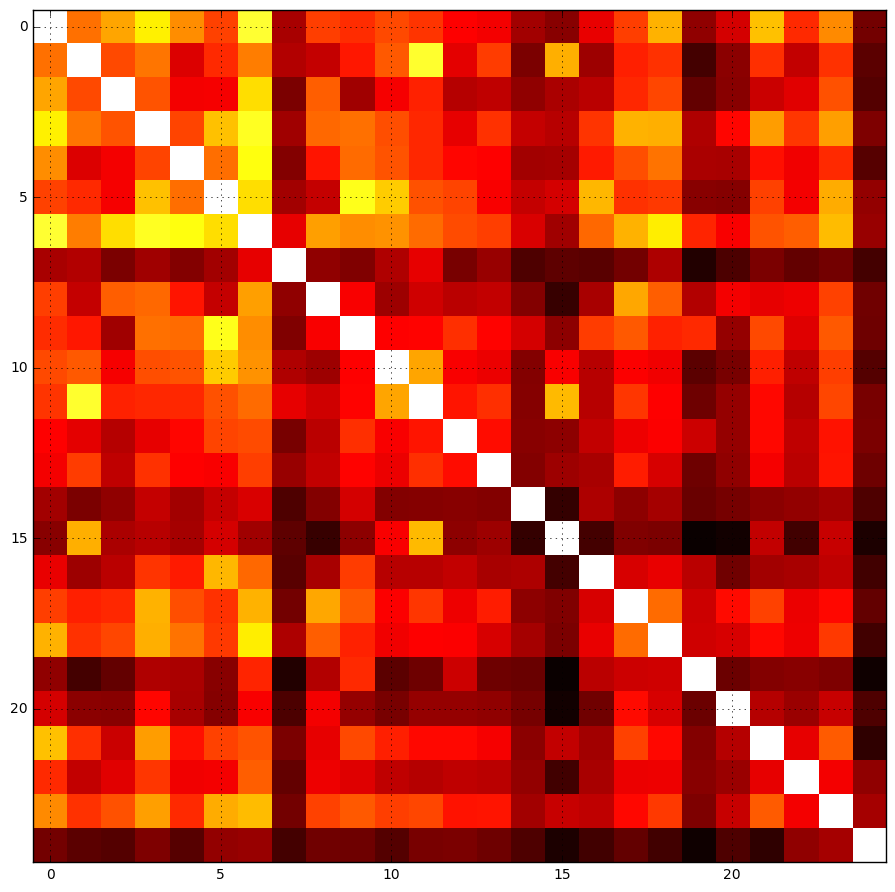

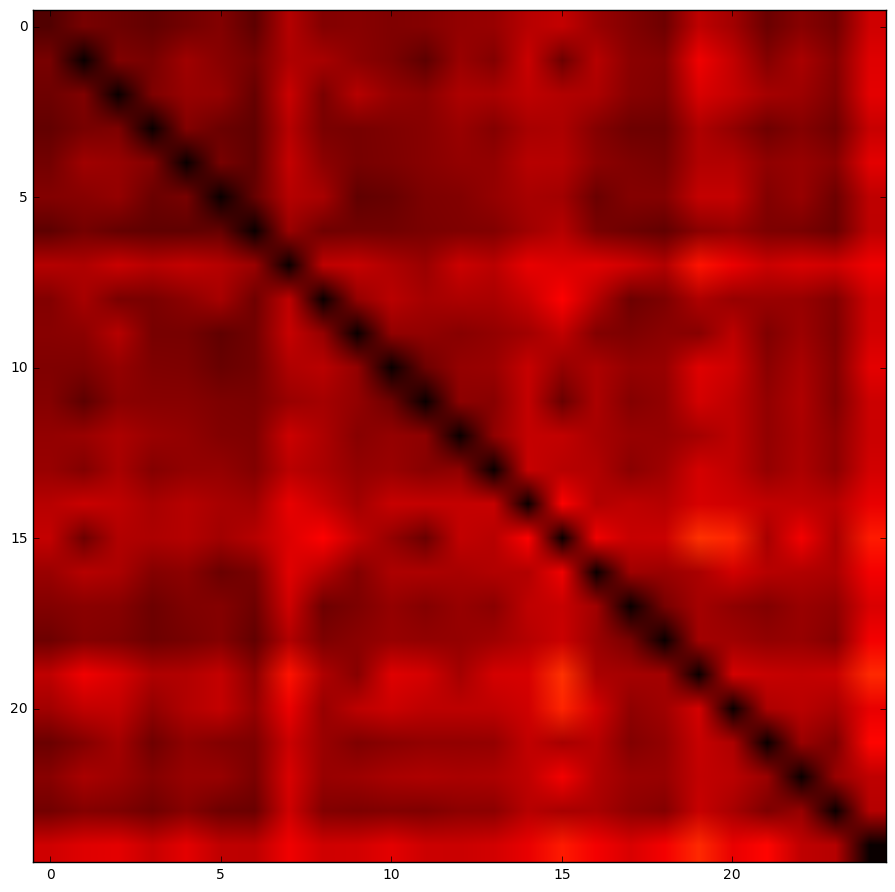

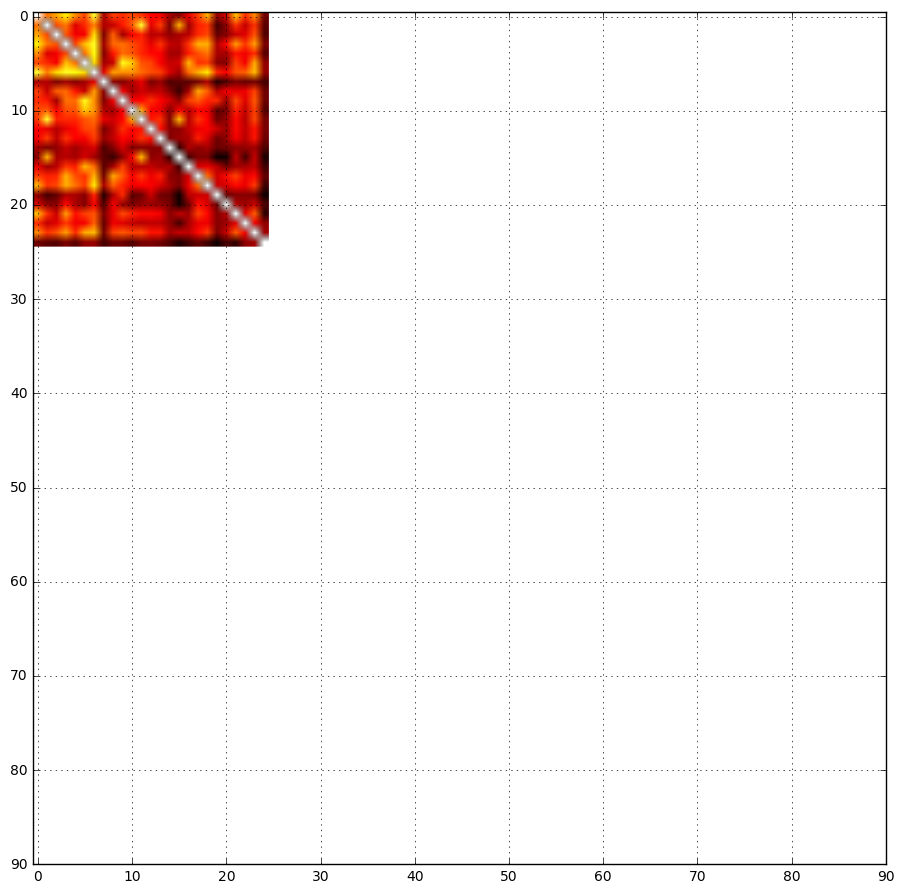

In [12]:
d = 2

mat = np.zeros((len(stimtrials), len(stimtrials)))
iu1 = np.triu_indices(len(stimtrials))
for ind, x in enumerate(divsave):

    mat[iu1[0][ind], iu1[1][ind]] = x[2]

mat = mat + mat.T

import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap('hot')
plt.figure(figsize=(11,11))
plt.imshow(1.0/mat, interpolation='nearest')
plt.grid(True)
plt.xticks(np.arange(0, len(stimtrials), 5))
plt.yticks(np.arange(0, len(stimtrials),5))
plt.savefig('/Users/brad/B1235_P02S01_1LaplacianComparison.pdf', format='pdf')
#plt.clim(vmin=3)

plt.figure(figsize=(11,11))
plt.imshow(mat[:, :])
plt.clim(0, 0.5)

plt.figure(figsize=(11,11))
normmat = mat/np.max(np.max(mat))
plt.imshow(1.0/normmat)
plt.grid(True)
plt.xticks(np.arange(0, 100, 10))
plt.yticks(np.arange(0,100, 10))

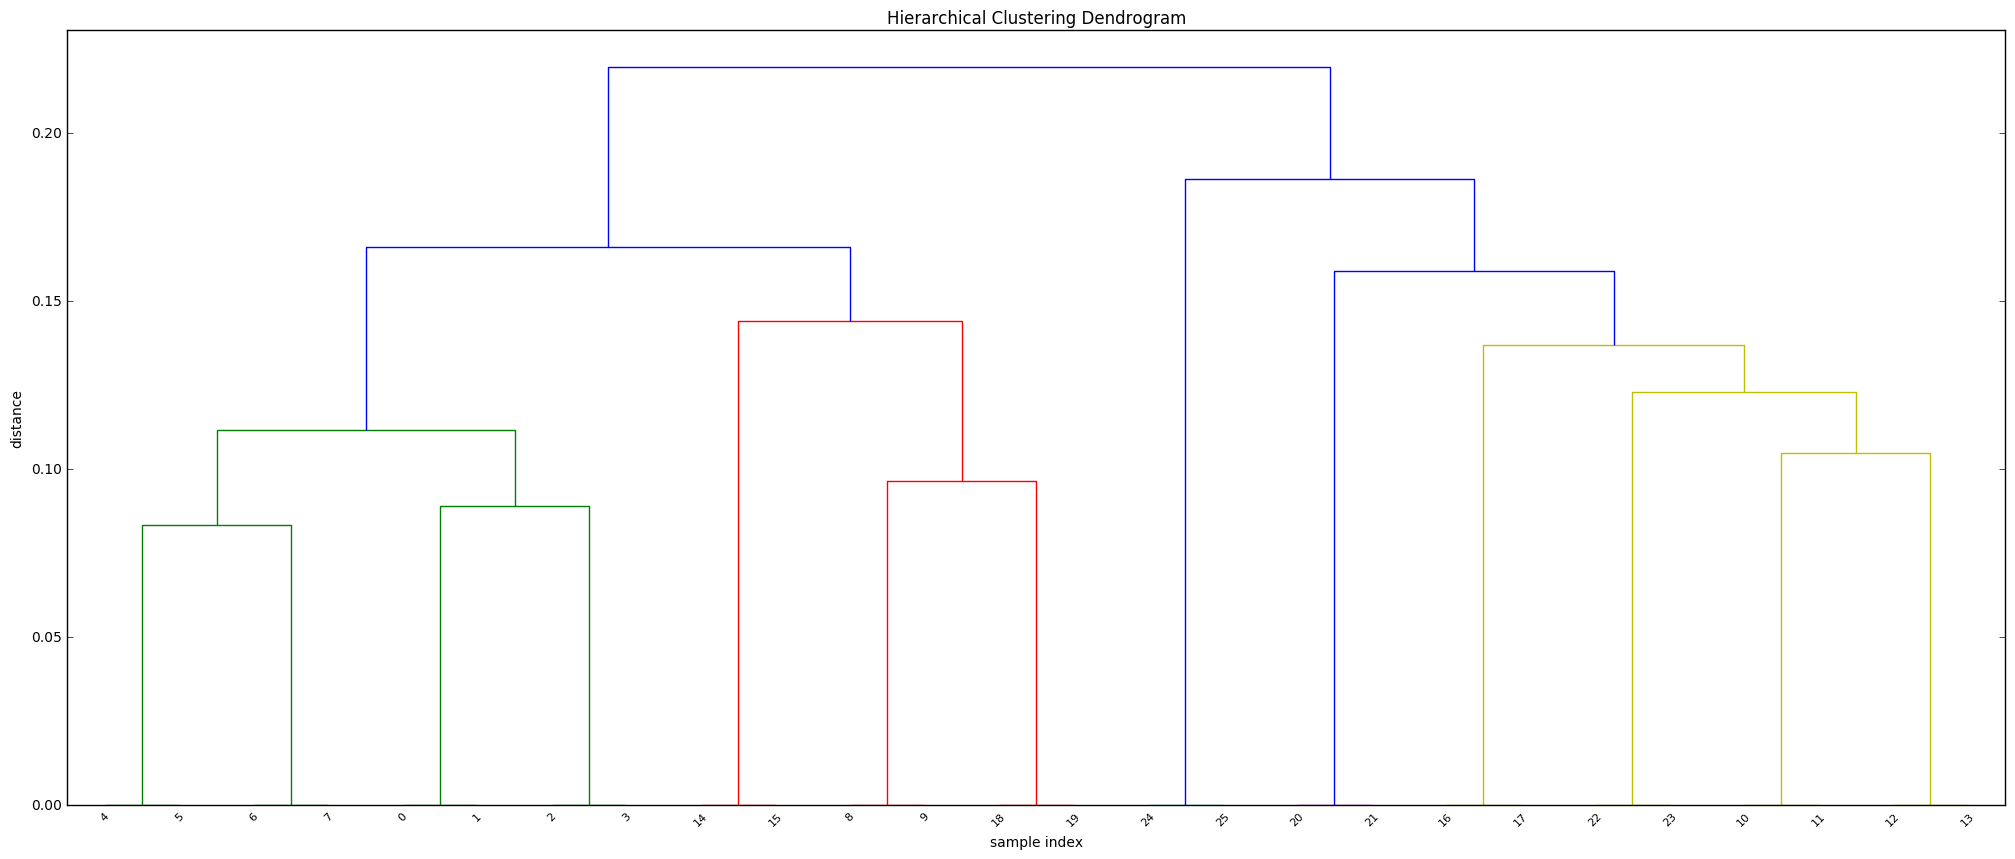

In [351]:
from scipy.cluster import hierarchy as ha

linmat = mat[np.triu_indices(len(stimtrials))]
Z = ha.linkage(linmat, method='complete')
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
ha.dendrogram(
    Z,
    #leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    #labels=labs
)
plt.show()


In [352]:
Z

array([[  0.        ,   1.        ,   0.        ,   2.        ],
       [  2.        ,   3.        ,   0.        ,   2.        ],
       [  4.        ,   5.        ,   0.        ,   2.        ],
       [  6.        ,   7.        ,   0.        ,   2.        ],
       [  8.        ,   9.        ,   0.        ,   2.        ],
       [ 10.        ,  11.        ,   0.        ,   2.        ],
       [ 12.        ,  13.        ,   0.        ,   2.        ],
       [ 14.        ,  15.        ,   0.        ,   2.        ],
       [ 16.        ,  17.        ,   0.        ,   2.        ],
       [ 18.        ,  19.        ,   0.        ,   2.        ],
       [ 20.        ,  21.        ,   0.        ,   2.        ],
       [ 22.        ,  23.        ,   0.        ,   2.        ],
       [ 24.        ,  25.        ,   0.        ,   2.        ],
       [ 28.        ,  29.        ,   0.08334283,   4.        ],
       [ 26.        ,  27.        ,   0.08912589,   4.        ],
       [ 30.        ,  35

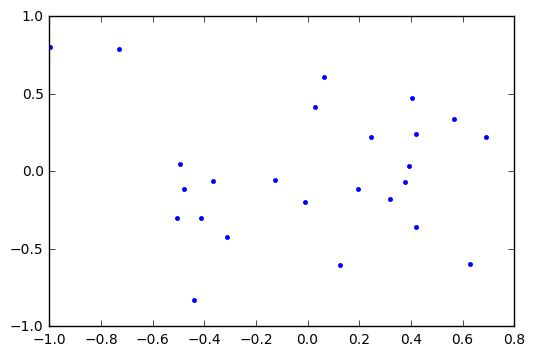

In [138]:
from sklearn.manifold import MDS

matMDS = MDS(n_components=2, dissimilarity='precomputed')
matMDS.fit(mat)
pts = matMDS.embedding_
#pts = np.log(pts)

plt.plot(pts[:, 0], pts[:, 1], 'b.')

In [139]:
r = np.diag(np.sqrt(np.dot(pts, pts.T)))
theta = np.arctan2(pts[:, 1], pts[:, 0])


/Users/brad/anaconda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


In [140]:
lr = np.log(r)
ptsx = lr*np.cos(theta)
ptsy = lr*np.sin(theta)

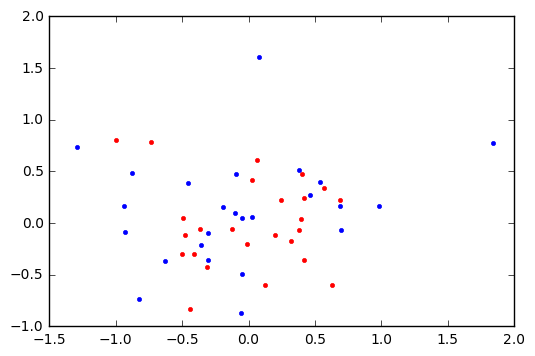

In [141]:
plt.plot(ptsx, ptsy, '.', pts[:, 0], pts[:, 1], 'r.')

In [80]:
from scipy.cluster import hierarchy as ha

linmat = mat[np.triu_indices(len(stimtrials))]
z = ha.linkage(linmat)

In [101]:
divsavefile = './B1235_P02S01_divsave.pkl'
with open(divsavefile, 'w') as f:
    pickle.dump(divsave, f)

In [160]:
scgTot

[[()],
 [(2,), (4,), (5,), (7,), (8,), (11,), (15,), (20,), (24,), (32,)],
 [],
 [],
 [],
 []]

In [185]:
E = sc.simplicialChainGroups([(1,2,3)])
(t, basis) = sc.stimSpaceGraph(E, sc.boundaryOperatorMatrix(E))
print(t)
print(basis)

[[ 0.  0.  0.  1.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  1.  0.]
 [ 1.  1.  0.  0.  0.  0.  1.]
 [ 1.  0.  1.  0.  0.  0.  1.]
 [ 0.  1.  1.  0.  0.  0.  1.]
 [ 0.  0.  0.  1.  1.  1.  0.]]
[(1,), (2,), (3,), (1, 2), (1, 3), (2, 3), (1, 2, 3)]


In [209]:
gms = sc.adjacency2maxsimp(t)

Egraph = sc.simplicialChainGroups(gms)
Dgraph = sc.boundaryOperatorMatrix(Egraph)
print(Dgraph)
print(Egraph)
sc.laplacian(sc.boundaryOperatorMatrix(Egraph), 0)

[array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.]]), array([[-1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1., -1.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0.,  0., -1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  1.,  0.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.]]), [], []]
[[()], [(0,), (1,), (2,), (3,), (4,), (5,), (6,)], [(0, 3), (0, 4), (1, 3), (1, 5), (2, 4), (2, 5), (3, 6), (4, 6), (5, 6)], []]


array([[ 2.,  0.,  0., -1., -1.,  0.,  0.],
       [ 0.,  2.,  0., -1.,  0., -1.,  0.],
       [ 0.,  0.,  2.,  0., -1., -1.,  0.],
       [-1., -1.,  0.,  3.,  0.,  0., -1.],
       [-1.,  0., -1.,  0.,  3.,  0., -1.],
       [ 0., -1., -1.,  0.,  0.,  3., -1.],
       [ 0.,  0.,  0., -1., -1., -1.,  3.]])

In [195]:
sc.graphLaplacian(t)

array([[ 2.,  0.,  0., -1., -1.,  0.,  0.],
       [ 0.,  2.,  0., -1.,  0., -1.,  0.],
       [ 0.,  0.,  2.,  0., -1., -1.,  0.],
       [-1., -1.,  0.,  3.,  0.,  0., -1.],
       [-1.,  0., -1.,  0.,  3.,  0., -1.],
       [ 0., -1., -1.,  0.,  0.,  3., -1.],
       [ 0.,  0.,  0., -1., -1., -1.,  3.]])

In [210]:
np.dot(Dgraph[1], Dgraph[1].T)
np.dot(Dgraph[0].T, Dgraph[0])

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [ ]:
(t, basis) = sc.stimSpaceGraph(scgTot, sc.boundaryOperatorMatrix(scgTot))
print(t)
print(basis)
gms = sc.adjacency2maxsimp(t)

Egraph = sc.simplicialChainGroups(gms)
Dgraph = sc.boundaryOperatorMatrix(Egraph)
print(Dgraph)
print(Egraph)
sc.laplacian(sc.boundaryOperatorMatrix(Egraph), 0)

In [309]:
ntrials = 5
stimtrials = [(s, t) for s in scg.keys() for t in range(20)]
stimtrials = [(s, t) for s in scg.keys()[0:2] for t in range(ntrials)]
stimtrials

[(u'F_scaled_burung', 0),
 (u'F_scaled_burung', 1),
 (u'F_scaled_burung', 2),
 (u'F_scaled_burung', 3),
 (u'F_scaled_burung', 4),
 (u'K_scaled_burung', 0),
 (u'K_scaled_burung', 1),
 (u'K_scaled_burung', 2),
 (u'K_scaled_burung', 3),
 (u'K_scaled_burung', 4)]

In [275]:
s1 = sc.simplicialChainGroups([(1,2,3)])
s2 = sc.simplicialChainGroups([(4,5,6)])
stimtrials = (s1, s2)


In [308]:
beta = 1
divsave = []
d = 0
for ind in range(len(stimtrials)):
    print(ind)
    for ind2 in range(ind, len(stimtrials)):
        
        stim1 = stimtrials[ind][0]
        t1 = stimtrials[ind][1]
        stim2 = stimtrials[ind2][0]
        t2 = stimtrials[ind2][1]
        #print(stim1, t1, stim2, t2)
        scg1 = scg[stim1][t1]
        scg2 = scg[stim2][t2]
        
        scgTot = sc.simplexUnion(scg1, scg2)
        (adjTot, basisTot) = sc.stimSpaceGraph(scgTot, sc.boundaryOperatorMatrix(scgTot))
        (adj1, basis1) = sc.stimSpaceGraph(scg1, sc.boundaryOperatorMatrix(scg1))
        (adj2, basis2) = sc.stimSpaceGraph(scg2, sc.boundaryOperatorMatrix(scg2))
        
        EgraphTot = sc.simplicialChainGroups(sc.adjacency2maxsimp(adjTot, basisTot))
        Egraph1 = sc.simplicialChainGroups(sc.adjacency2maxsimp(adj1, basis1))
        Egraph2 = sc.simplicialChainGroups(sc.adjacency2maxsimp(adj2, basis2))
        D1 = sc.maskedBoundaryOperatorMatrix(EgraphTot, Egraph1)
        D2 = sc.maskedBoundaryOperatorMatrix(EgraphTot, Egraph2)
        
        #rhos1 = sc.densityMatrices(D1, beta*np.ones(len(D1)))
        #rhos2 = sc.densityMatrices(D2, beta*np.ones(len(D2)))
        
        L1 = sc.laplacian(D1, d)
        L2 = sc.laplacian(D2, d)
        
        rho1 = sc.densityMatrix(L1, beta)
        rho2 = sc.densityMatrix(L2, beta)
        #div = sc.JSdivergences(rhos1, rhos2)
        div = sc.JSdivergence(rho1, rho2)
        divsave.append(((stim1, t1), (stim2, t2), div))
        
mat = np.zeros((len(stimtrials), len(stimtrials)))
iu1 = np.triu_indices(len(stimtrials))
for ind, x in enumerate(divsave):
    mat[iu1[0][ind], iu1[1][ind]] = x[2]
mat = mat + mat.T

import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap('hot')
plt.figure(figsize=(11,11))
plt.imshow(1.0/mat, interpolation='none')
plt.grid(True)
plt.xticks(np.arange(0, len(stimtrials), ntrials))
plt.yticks(np.arange(0, len(stimtrials),ntrials))
#plt.clim(vmin=3)

plt.figure(figsize=(11,11))
plt.imshow(mat[:, :])
#plt.clim(0, 0.5)



0


KeyboardInterrupt: 

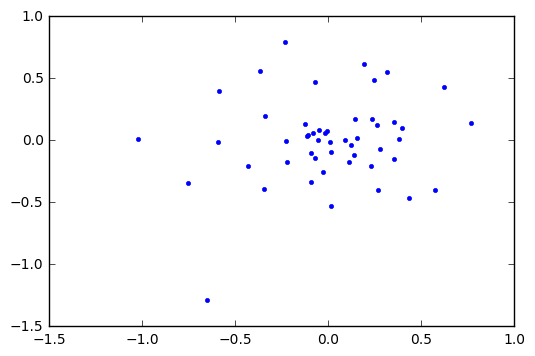

In [267]:
from sklearn.manifold import MDS

matMDS = MDS(n_components=2, dissimilarity='precomputed')
matMDS.fit(mat)
pts = matMDS.embedding_
#pts = np.log(pts)

plt.plot(pts[:, 0], pts[:, 1], 'b.')

/Users/brad/anaconda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in divide
/Users/brad/anaconda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: divide by zero encountered in divide


([<matplotlib.axis.YTick at 0x11803d650>,
 <a list of 10 Text yticklabel objects>)

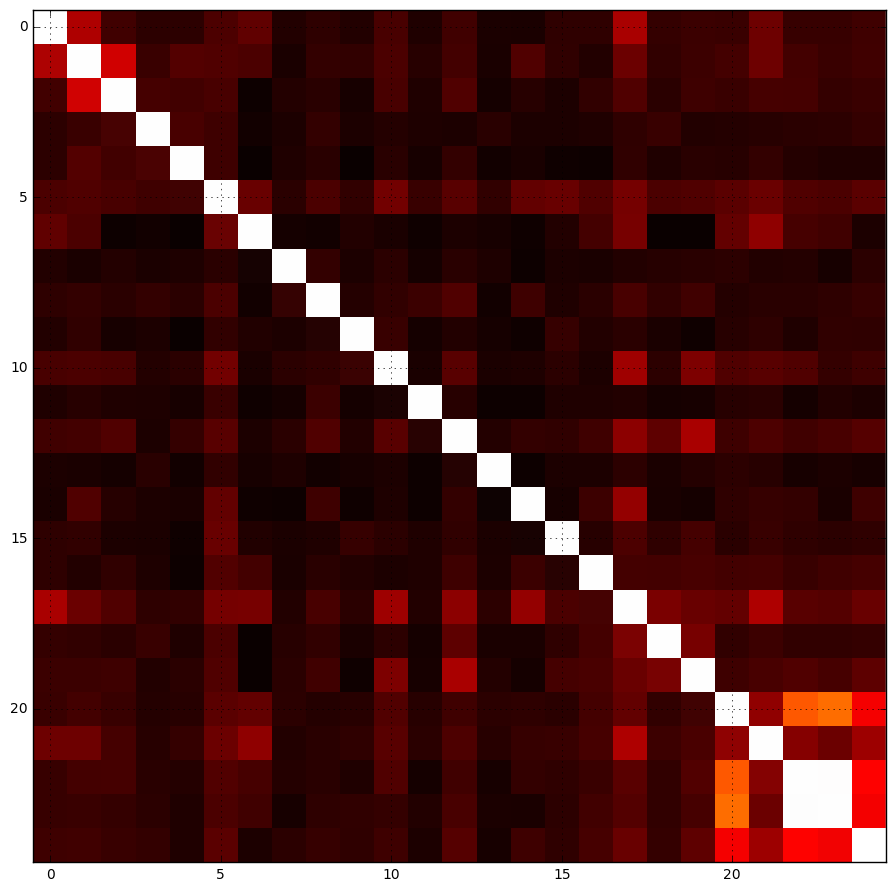

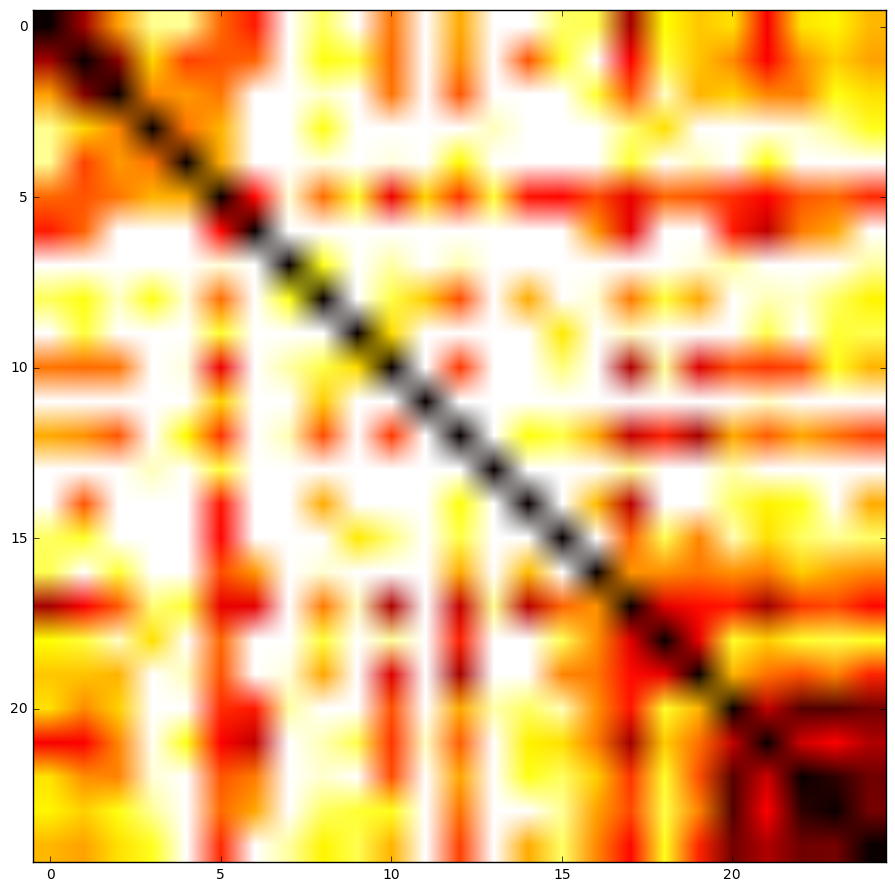

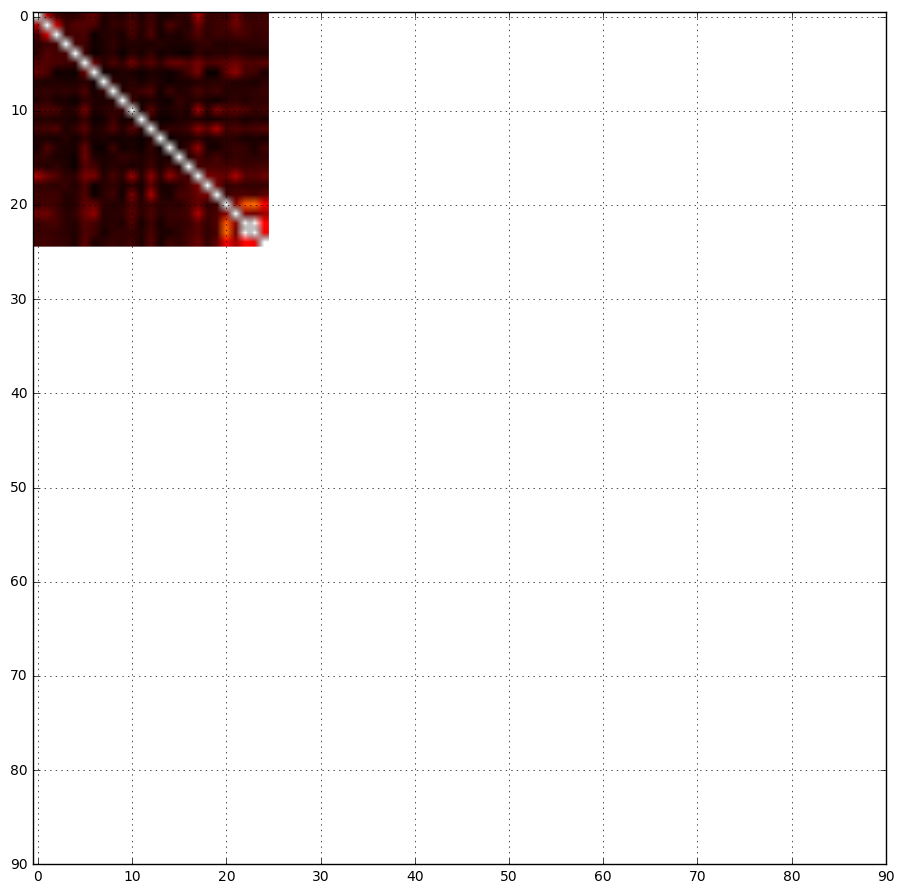

In [256]:
mat = np.zeros((len(stimtrials), len(stimtrials)))
iu1 = np.triu_indices(len(stimtrials))
for ind, x in enumerate(divsave):
    mat[iu1[0][ind], iu1[1][ind]] = x[2]
mat = mat + mat.T

import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap('hot')
plt.figure(figsize=(11,11))
plt.imshow(1.0/mat, interpolation='none')
plt.grid(True)
plt.xticks(np.arange(0, len(stimtrials), ntrials))
plt.yticks(np.arange(0, len(stimtrials),ntrials))
#plt.clim(vmin=3)

plt.figure(figsize=(11,11))
plt.imshow(mat[:, :])
plt.clim(0, 0.5)

plt.figure(figsize=(11,11))
normmat = mat/np.max(np.max(mat))
plt.imshow(1.0/normmat)
plt.grid(True)
plt.xticks(np.arange(0, 100, 10))
plt.yticks(np.arange(0,100, 10))

In [251]:
scg1 = sc.simplicialChainGroups([(1,2,3)])
scg2 = sc.simplicialChainGroups([(4,5,6)])
scgTot = sc.simplexUnion(scg1, scg2)
(adjTot, basisTot) = sc.stimSpaceGraph(scgTot, sc.boundaryOperatorMatrix(scgTot))
(adj1, basis1) = sc.stimSpaceGraph(scg1, sc.boundaryOperatorMatrix(scg1))
(adj2, basis2) = sc.stimSpaceGraph(scg2, sc.boundaryOperatorMatrix(scg2))
        
EgraphTot = sc.simplicialChainGroups(sc.adjacency2maxsimp(adjTot, basisTot))
Egraph1 = sc.simplicialChainGroups(sc.adjacency2maxsimp(adj1, basis1))
Egraph2 = sc.simplicialChainGroups(sc.adjacency2maxsimp(adj2, basis2))
D1 = sc.maskedBoundaryOperatorMatrix(EgraphTot, Egraph1)
D2 = sc.maskedBoundaryOperatorMatrix(EgraphTot, Egraph2)
print(D1)
print(D2)

[array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.]]), array([[-1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 1.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  1., -1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  

In [318]:
s1 = sc.simplicialChainGroups([(1,2,3)])
s2 = sc.simplicialChainGroups([(4,5,6)])
stimtrials = []

ntrials = 5
for ind in range(ntrials):
    n = np.random.rand(15, 200)
    n = (n > 0.9).astype(int)
    maxSimpList = sorted(sc.binarytomaxsimplex(n, rDup=True))
    E = sc.simplicialChainGroups(maxSimpList)
    stimtrials.append(E)

beta = 1
divsave = []
d = 0
for ind in range(len(stimtrials)):
    print(ind)
    for ind2 in range(ind, len(stimtrials)):
        
        #stim1 = stimtrials[ind][0]
        #t1 = stimtrials[ind][1]
        #stim2 = stimtrials[ind2][0]
        #t2 = stimtrials[ind2][1]
        #print(stim1, t1, stim2, t2)
        #scg1 = scg[stim1][t1]
        #scg2 = scg[stim2][t2]
        stim1 = ind
        stim2 = ind2
        t1 = stim1
        t2 = stim2
        scg1 = stimtrials[ind]
        scg2 = stimtrials[ind2]
        
        scgTot = sc.simplexUnion(scg1, scg2)
        (adjTot, basisTot) = sc.stimSpaceGraph(scgTot, sc.boundaryOperatorMatrix(scgTot))
        (adj1, basis1) = sc.stimSpaceGraph(scg1, sc.boundaryOperatorMatrix(scg1))
        (adj2, basis2) = sc.stimSpaceGraph(scg2, sc.boundaryOperatorMatrix(scg2))
        
        EgraphTot = sc.simplicialChainGroups(sc.adjacency2maxsimp(adjTot, basisTot))
        Egraph1 = sc.simplicialChainGroups(sc.adjacency2maxsimp(adj1, basis1))
        Egraph2 = sc.simplicialChainGroups(sc.adjacency2maxsimp(adj2, basis2))
        D1 = sc.maskedBoundaryOperatorMatrix(EgraphTot, Egraph1)
        D2 = sc.maskedBoundaryOperatorMatrix(EgraphTot, Egraph2)
        
        #rhos1 = sc.densityMatrices(D1, beta*np.ones(len(D1)))
        #rhos2 = sc.densityMatrices(D2, beta*np.ones(len(D2)))
        
        L1 = sc.laplacian(D1, d)
        L2 = sc.laplacian(D2, d)
        
        rho1 = sc.densityMatrix(L1, beta)
        rho2 = sc.densityMatrix(L2, beta)
        #div = sc.JSdivergences(rhos1, rhos2)
        div = sc.JSdivergence(rho1, rho2)
        divsave.append(((stim1, t1), (stim2, t2), div))
 

0
1
2
3
4


/Users/brad/anaconda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in divide


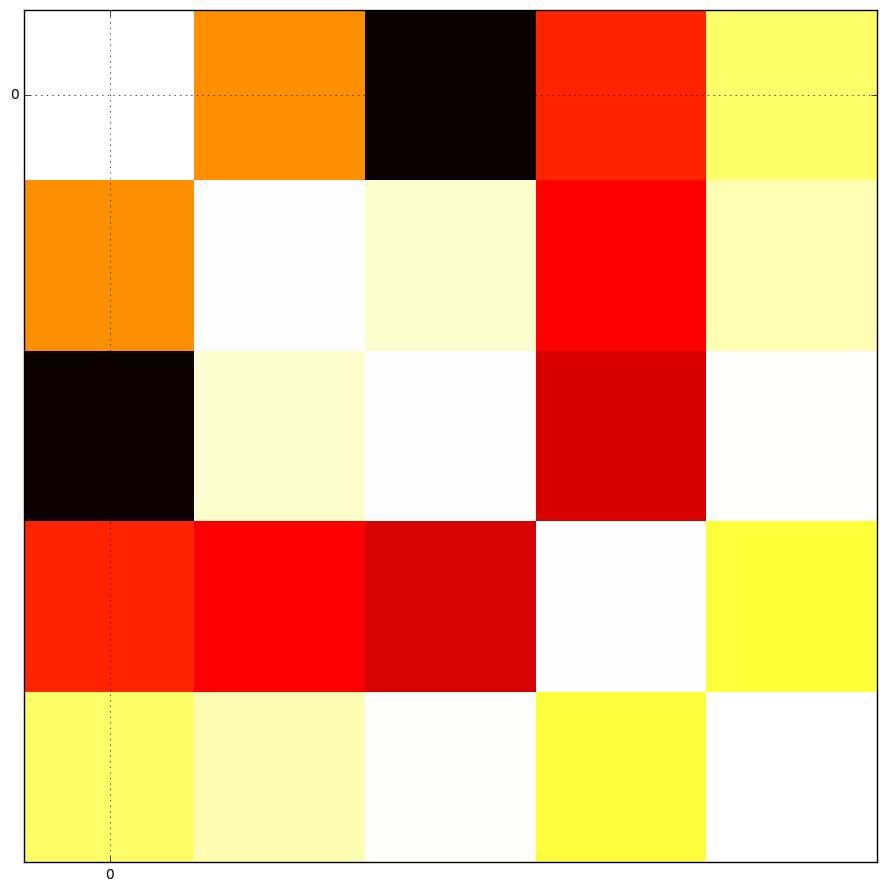

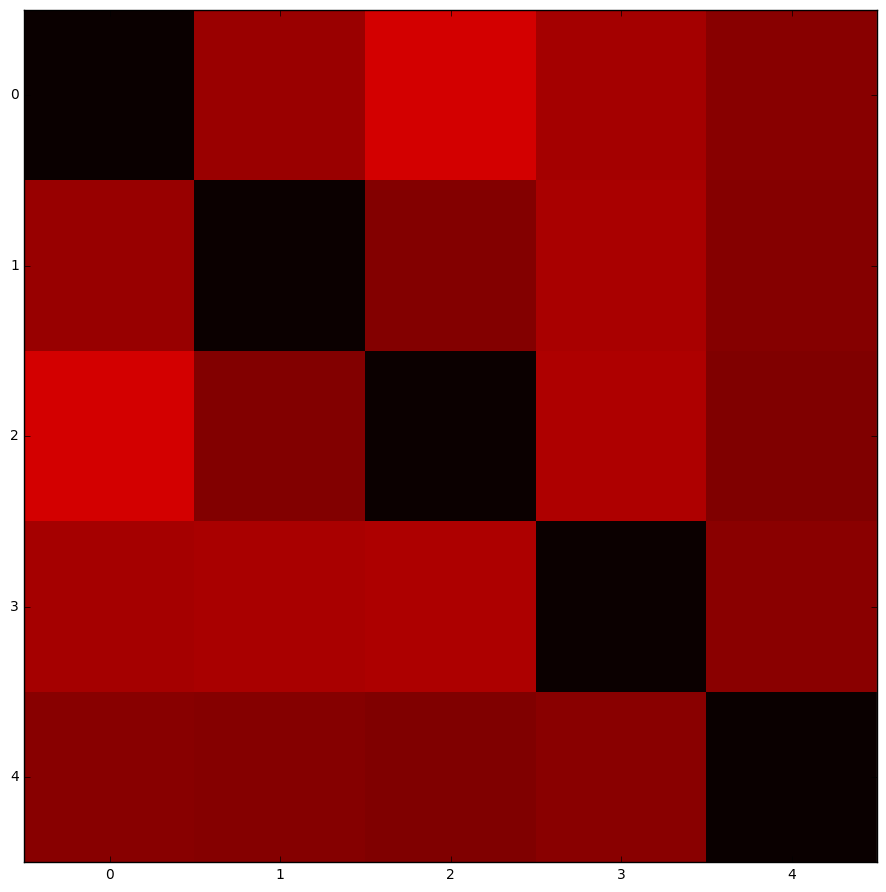

In [319]:
       
mat = np.zeros((len(stimtrials), len(stimtrials)))
iu1 = np.triu_indices(len(stimtrials))
for ind, x in enumerate(divsave):
    mat[iu1[0][ind], iu1[1][ind]] = x[2]
mat = mat + mat.T

import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap('hot')
plt.figure(figsize=(11,11))
plt.imshow(1.0/mat, interpolation='none')
plt.grid(True)
plt.xticks(np.arange(0, len(stimtrials), ntrials))
plt.yticks(np.arange(0, len(stimtrials),ntrials))
#plt.clim(vmin=3)

plt.figure(figsize=(11,11))
plt.imshow(mat[:, :], interpolation='none')
plt.clim(0, 0.5)

In [320]:
ds = mat[np.triu_indices(len(stimtrials))]

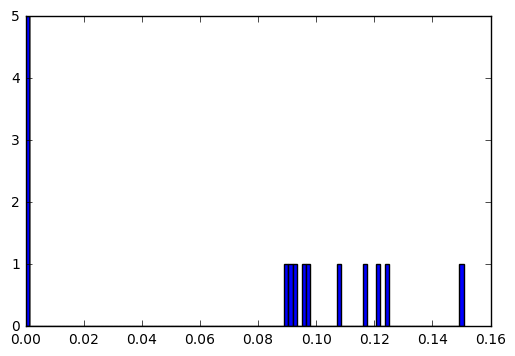

In [321]:
dontcare = plt.hist(ds, bins=100)

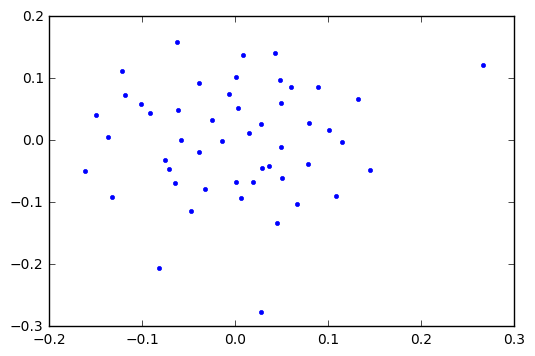

In [313]:
from sklearn.manifold import MDS

matMDS = MDS(n_components=2, dissimilarity='precomputed')
matMDS.fit(mat)
pts = matMDS.embedding_
#pts = np.log(pts)

plt.plot(pts[:, 0], pts[:, 1], 'b.')

In [19]:
stimSimplexes = []
for stim in scg.keys():
    stimTotalSimplex = [[]]
    stimData = scg[stim]
    for trial in stimData.keys():
        #print((stim, trial))
        trialData = stimData[trial]
        stimTotalSimplex = sc.simplexUnion(stimTotalSimplex, trialData)
    stimSimplexes.append((stim, stimTotalSimplex))

beta = 0.25
divsave = []
d = 0
for ind in range(len(stimSimplexes)):
    print(ind)
    for ind2 in range(ind, len(stimSimplexes)):
        
        stim1 = stimSimplexes[ind][0]
        stim2 = stimSimplexes[ind2][0]
        scg1 = stimSimplexes[ind][1]
        scg2 = stimSimplexes[ind2][1]
        scgTot = sc.simplexUnion(scg1, scg2)
        D1 = sc.maskedBoundaryOperatorMatrix(scgTot, scg1)
        D2 = sc.maskedBoundaryOperatorMatrix(scgTot, scg2)
        
        #rhos1 = sc.densityMatrices(D1, beta*np.ones(len(D1)))
        #rhos2 = sc.densityMatrices(D2, beta*np.ones(len(D2)))
        
        L1 = sc.laplacian(D1, d)
        L2 = sc.laplacian(D2, d)
        
        rho1 = sc.densityMatrix(L1, beta)
        rho2 = sc.densityMatrix(L2, beta)
        #div = sc.JSdivergences(rhos1, rhos2)
        div = sc.JSdivergence(rho1, rho2)
        divsave.append(((stim1, stim2), div))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


/Users/brad/anaconda/envs/neuraltda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in divide


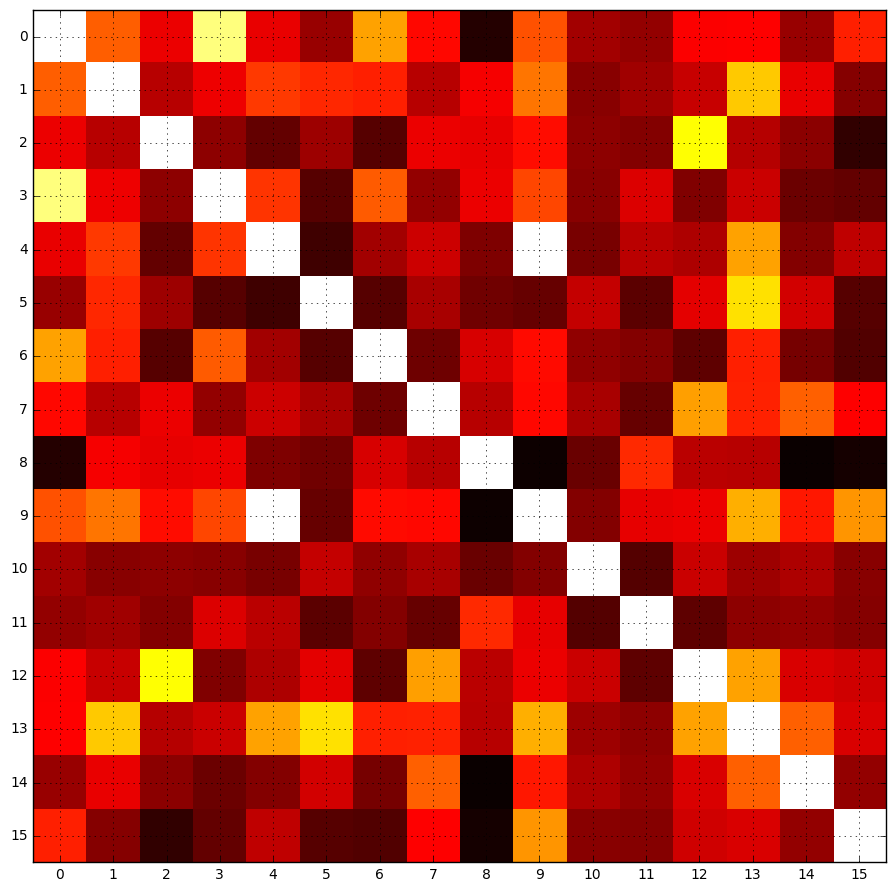

In [21]:
mat = np.zeros((len(stimSimplexes), len(stimSimplexes)))
iu1 = np.triu_indices(len(stimSimplexes))
for ind, x in enumerate(divsave):

    mat[iu1[0][ind], iu1[1][ind]] = x[1]

mat = mat + mat.T

import matplotlib.pyplot as plt
%matplotlib inline

plt.set_cmap('hot')
plt.figure(figsize=(11,11))
plt.imshow(1.0/mat, interpolation='nearest')
plt.grid(True)
plt.xticks(np.arange(0, len(stimSimplexes), 1))
plt.yticks(np.arange(0, len(stimSimplexes),1))
plt.savefig('/Users/brad/B1235_P02S01_0LaplacianComparisonAllTrialsUnion.pdf', format='pdf')
#plt.clim(vmin=3)

In [17]:
for ind, stim in enumerate(scg.keys()):
    print((ind, stim))

(0, u'F_scaled_burung')
(1, u'K_scaled_burung')
(2, u'O_scaled_burung')
(3, u'P_scaled_burung')
(4, u'M_scaled_burung')
(5, u'C_scaled_burung')
(6, u'G_scaled_burung')
(7, u'H_scaled_burung')
(8, u'E_scaled_burung')
(9, u'L_scaled_burung')
(10, u'I_scaled_burung')
(11, u'J_scaled_burung')
(12, u'N_scaled_burung')
(13, u'D_scaled_burung')
(14, u'A_scaled_burung')
(15, u'B_scaled_burung')
